CEC470 Project: Personal Computer vs. Workstation in Machine Learning Tasks
===========================================================================
**Author: Calvin Henggler & Heerithan Shanthan**

Group members: Zach Hart, Calvin Henggeler, Heeirthan Shanthan, Tyler Thurman

Machine Learning is a booming concept in computer and data sciences with many applications. Developing machine learning models is primarily a CPU intensive task because of the 

In [102]:
import pandas as pd
import time
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from multiprocessing import Pool, cpu_count

## Single Threaded Tasks:
1) inline algorithm performance (collatz length)
2) data cleaning/ preparation

#### 1) Series Algorithm performance
Computations for machine learning are based around mathematical operations. Training a single simple model might rely on a series of simple or longer computations or algorithms.

In [103]:
def collatz_len(n):
    """ Finds the number of steps to arrive at 1 from the number n using the Collatz conjecture """
    steps = 0
    while n != 1:
        # n is even
        if n % 2 == 0:
            n = n//2
        # n is odd
        else:
            n = 3*n + 1

        steps = steps + 1
    return steps

In [104]:
# Compute the Collatz length of a random integer 1000 times and take the average time.
execution_times = []
for x in range(0,1000):
    t_start = time.time_ns()
    for ii in range(1,1000):
        len = collatz_len(ii)
    t_end = time.time_ns()
    execution_times.append(t_end - t_start)
print(f"Mean execution time = {mean(execution_times)} nanoseconds")

Mean execution time = 6264327.581 nanoseconds


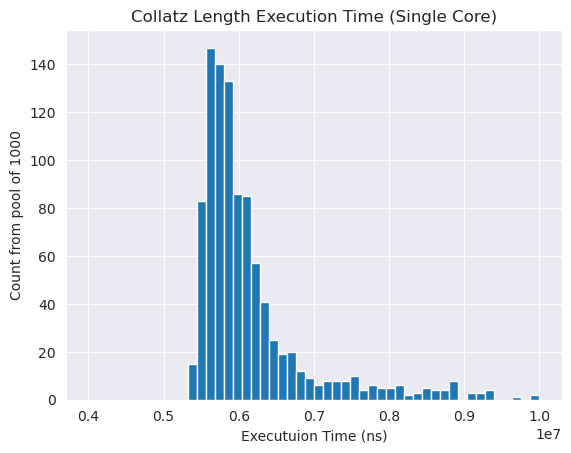

In [105]:
# make a histogram of the Colatz execution times 
# print(execution_times)
plt.hist(execution_times,bins=50, range=[4*10**6,10**7])
plt.xlabel('Executuion Time (ns)')
plt.ylabel('Count from pool of 1000')
plt.title('Collatz Length Execution Time (Single Core)')
plt.show()

In [106]:
execution_times = []
for x in range(0, 100):
    t_start = time.time_ns()
    for ii in range(1, 10**5):
        len = collatz_len(ii)
    t_end = time.time_ns()
    execution_times.append(t_end - t_start)
print(f"Mean execution time = {mean(execution_times)} nanoseconds")

Mean execution time = 1114352816.48 nanoseconds


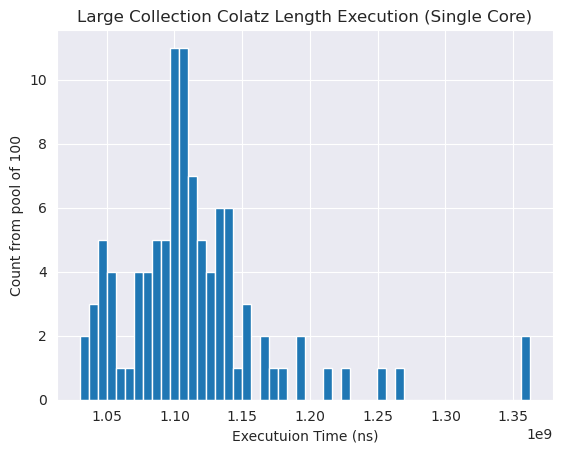

In [107]:
# make a histogram of the Colatz execution times 
# print(execution_times)
plt.hist(execution_times, bins=50)
plt.xlabel('Executuion Time (ns)')
plt.ylabel('Count from pool of 100')
plt.title('Large Collection Colatz Length Execution (Single Core)')
plt.show()

#### 2) Data Cleaning / Preparation
Data preparation is a major part of the data science workflow. The raw collected data is often not in the best form to train the ML models. Common processes in data preparation include feature selection, normalization, generating data subsets for training, testing and validation. The pace in which these tasks gets completed dies not typically rely on the computer performance but rather the metholdolgy that the user choses. That said, it is still important to understand the capabilities of the machine for prepartion of data and perferforming typical organization tasks and mathematical operations often used in the prepartion process.

The following lines of code mimic a typical data prepartion process for multiple data sets

In [108]:
t_housing = []
t_county = []
t_wine = []
t_dataprep = []

for x in range(0,1000):

    # ----------------------------
    # Housing data set preparation
    # ----------------------------
    t_start = time.time_ns()
    # df_housing = pd.read_csv('C:/Users/heeir/Downloads//housing.csv')
    df_housing  = pd.read_csv('data/housing.csv')
    
    # switching latitiude and longitude order in the DataFrame
    df_housing = df_housing[['latitude', 'longitude', 'housing_median_age', 'total_rooms',
                             'total_bedrooms', 'population', 'households', 'median_income',
                             'median_house_value', 'ocean_proximity']]
    features = ['housing_median_age', 'total_rooms','total_bedrooms',
                'population', 'households', 'median_income']
    target = ['median_house_value']
    
    # drop columns we won't use
    df_housing = df_housing[features + target]
    # drop rows with missing data in one of the remaining columns
    df_housing = df_housing.dropna()
    
    x_housing_tr, x_temp, y_housing_tr, y_temp = train_test_split(df_housing[features], df_housing[target],
                                                                  test_size=0.2, random_state=0)
    x_housing_va, x_housing_te, y_housing_va, y_housing_te = train_test_split(x_temp, y_temp,
                                                                              test_size=0.5, random_state=0)
    t_end = time.time_ns()
    t_prep_housing = t_end - t_start
    t_housing.append(t_prep_housing)
    
    # --------------------
    # County info data set
    # --------------------
    t_start = time.time_ns()
    df_county = pd.read_csv('data/county_info.csv')
    df_county['annual_pop_growth_rate'] = ((df_county['pop_in_later_year']/df_county['pop_in_2000'])**(1/
                                            (df_county['pop_ref_later_year']-2000))-1) * 100
    df_county['annual_house_value_growth_rate'] = ((df_county['median_house_value_2017']/
                                                    df_county['median_house_value_2000'])**(1/(2017-2000))-1) * 100
    
    features =  ['pop_foreign_born' , 'adult_obes_rate', 'pop_per_sq_mi','pop_percent_urban', 'poverty_pct', 'median_house_income_ref_val', 'median_house_income_ref_yr', 'median_house_income_2017', 'cost_of_living_usd','annual_pop_growth_rate', 'annual_house_value_growth_rate']

    target = ['median_house_value_2000']
    # drop columns we won't use
    df_county = df_county[features + target]
    # drop rows with missing data in one of the remaining columns
    df_county = df_county.dropna()
    
    x_county_tr, x_temp, y_county_tr, y_temp = train_test_split(df_county[features], df_county[target],
                                                                  test_size=0.2, random_state=0)
    x_county_va, x_county_te, y_county_va, y_county_te = train_test_split(x_temp, y_temp,
                                                                              test_size=0.5, random_state=0)
    t_end = time.time_ns()
    t_prep_county = t_end - t_start
    t_county.append(t_prep_county)
    
    # ------------------------
    # Wine Dataset Preparation
    # ------------------------
    t_start = time.time_ns()
    # combine red and white data sets
    df_red = pd.read_csv('data/winequality-red.csv',sep = ';')
    df_red['color'] = 1
    df_white = pd.read_csv('data/winequality-white.csv',sep = ';')
    df_white['color'] = 0
    df_wine = pd.concat([df_red,df_white])
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol', 'color']
    target = ['quality']
    # Train 80% | Validation 20% | Test 20%
    x_wine_tr, x_te, y_wine_tr, y_te = train_test_split(df_wine[features], df_wine[target],
                                              train_size=0.8, random_state=0)
    x_wine_tr, x_wine_va, y_wine_tr, y_wine_va = train_test_split(x_wine_tr, y_wine_tr,
                                              train_size=0.5, random_state=0)
    t_end = time.time_ns()
    t_prep_wine = t_end - t_start
    t_wine.append(t_prep_wine)
    
    t_dataprep.append(t_prep_wine + t_prep_county + t_prep_housing)

Housing Average: 20258627.346 ns 
 County Average: 17357416.153 ns 
Wine Average: 9834598.634 ns 
Total Average: 47450642.133 ns


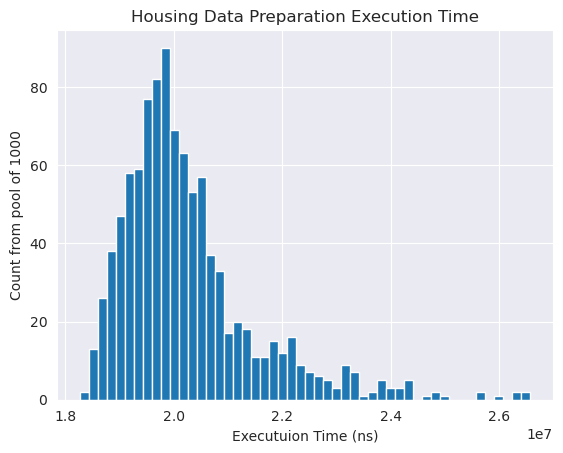

In [109]:
print(f'Housing Average: {mean(t_housing)} ns \n '
      f'County Average: {mean(t_county)} ns \n'
      f'Wine Average: {mean(t_wine)} ns \n'
      f'Total Average: {mean(t_dataprep)} ns')

# make a histogram of the prep  execution times 
# print(execution_times)
plt.hist(t_housing, bins=50)
plt.xlabel('Executuion Time (ns)')
plt.ylabel('Count from pool of 1000')
plt.title('Housing Data Preparation Execution Time')
plt.show()

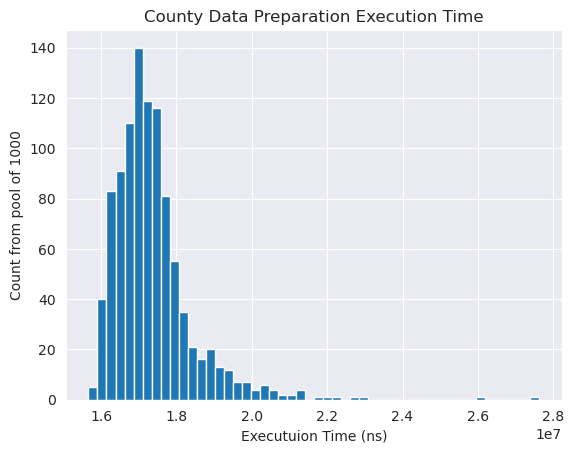

In [110]:
plt.hist(t_county, bins=50)
plt.xlabel('Executuion Time (ns)')
plt.ylabel('Count from pool of 1000')
plt.title('County Data Preparation Execution Time')
plt.show()

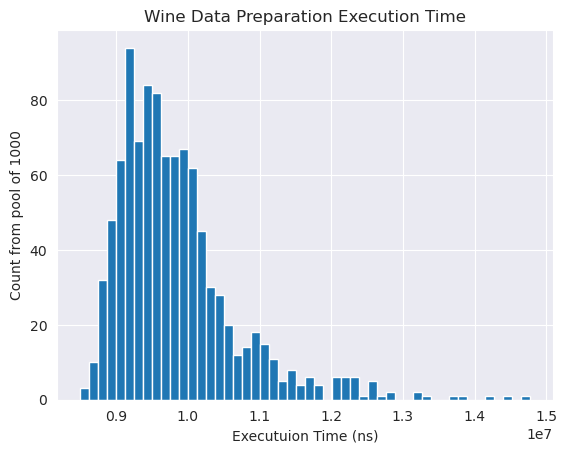

In [111]:
plt.hist(t_wine, bins=50)
plt.xlabel('Executuion Time (ns)')
plt.ylabel('Count from pool of 1000')
plt.title('Wine Data Preparation Execution Time')
plt.show()

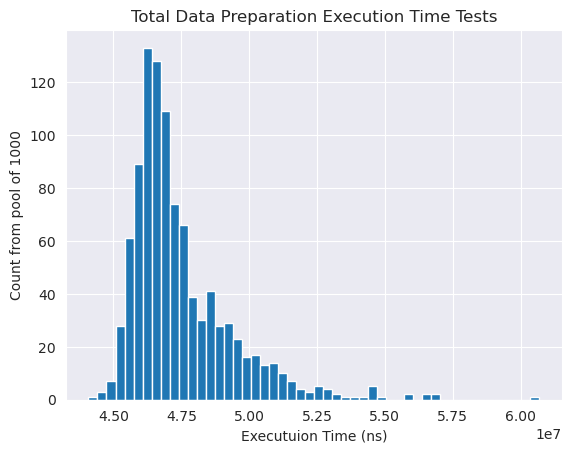

In [112]:
plt.hist(t_dataprep, bins=50)
plt.xlabel('Executuion Time (ns)')
plt.ylabel('Count from pool of 1000')
plt.title('Total Data Preparation Execution Time Tests')
plt.show()

## Multiprocessing/ Multi threading Tasks
1) Parellel algorithm Performance (collatz length)
2) Random forest training (Classifier and Regressor)

#### Collatz small input set

In [113]:
# Enabling multiprocessing for collatz length
processes = cpu_count() - 1
execution_times = []
inpt = range(1, 1000)

In [114]:
mult_exec_times = []
for x in range(1,1000):
    t_start = time.time_ns()
    with Pool(processes=processes) as pool:
            res = pool.map(collatz_len, inpt)
    t_end = time.time_ns()
    #execution_times.append(t_end - t_start)
    mult_exec_times.append(t_end - t_start)
mean(mult_exec_times)

103001281.6056056

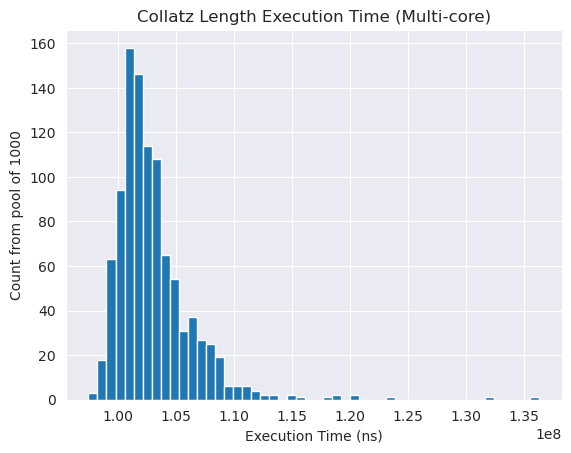

In [115]:
# make a histogram of the Colatz execution times 
# print(execution_times)
plt.hist(mult_exec_times, bins=50)
plt.xlabel('Execution Time (ns)')
plt.ylabel('Count from pool of 1000')
plt.title('Collatz Length Execution Time (Multi-core)')
plt.show()

#### Collatz with Large Input Set

In [116]:
inpt = range(1,10**5)
mult_exec_times = []
for x in range(1,100):
    t_start = time.time_ns()
    with Pool(processes=processes) as pool:
            res = pool.map(collatz_len, inpt)
    t_end = time.time_ns()
    mult_exec_times.append(t_end - t_start)
mean(mult_exec_times)

414887109.31313133

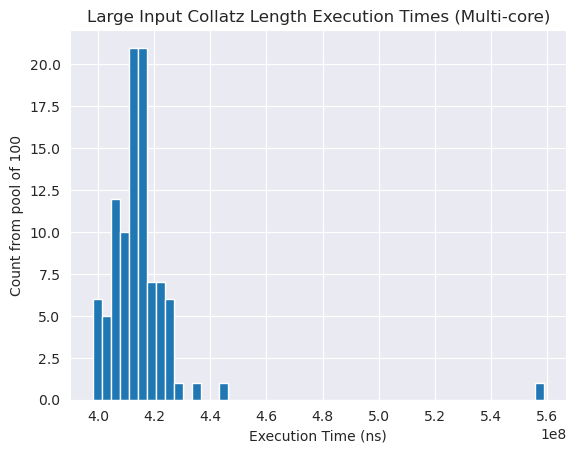

In [117]:
# make a histogram of the Colatz execution times 
# print(execution_times)
plt.hist(mult_exec_times, bins=50)
plt.xlabel('Execution Time (ns)')
plt.ylabel('Count from pool of 100')
plt.title('Large Input Collatz Length Execution Times (Multi-core)')
plt.show()

#### Execution time for Training Random Forests

In [119]:
t_housing = []
t_county = []
t_wine = []
t_train = []

for ii in range(0,100):
    # n_jobs=-1 uses all available cores
    housing_rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=ii)
    county_rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=ii)
    wine_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=ii)
    
    """ train housing model"""
    t_start = time.time_ns()
    housing_rf.fit(x_housing_tr, y_housing_tr)
    t_end = time.time_ns()
    t_train_housing = t_end - t_start
    t_housing.append(t_train_housing)
    
    """train county model"""
    t_start = time.time_ns()
    county_rf.fit(x_county_tr, y_county_tr)
    t_end = time.time_ns()
    t_train_county = t_end-t_start
    t_county.append(t_train_county)
    
    """Train wine model"""
    t_start = time.time_ns()
    wine_rf.fit(x_wine_tr, y_wine_tr)
    t_end = time.time_ns()
    t_train_wine = t_end-t_start
    t_wine.append(t_train_wine)
    
    """ Cumulative execution time"""
    t_train.append(t_train_housing + t_train_county + t_train_wine)
    
print(f'Housing Average: {mean(t_housing)} ns \n '
      f'County Average: {mean(t_county)} ns \n'
      f'Wine Average: {mean(t_wine)} ns \n'
      f'Total Average: {mean(t_train)} ns')

/home/calvin/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/calvin/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/calvin/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/calvin/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Housing Average: 1543987016.58 ns 
 County Average: 380899647.58 ns 
Wine Average: 259189618.55 ns 
Total Average: 2184076282.71 ns


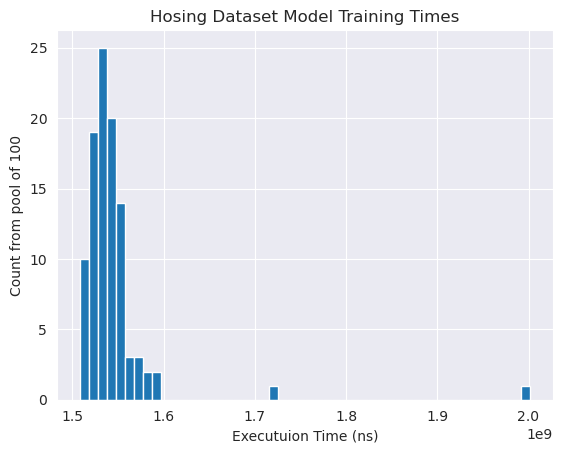

In [120]:
plt.hist(t_housing, bins=50)
plt.xlabel('Executuion Time (ns)')
plt.ylabel('Count from pool of 100')
plt.title('Hosing Dataset Model Training Times')
plt.show()

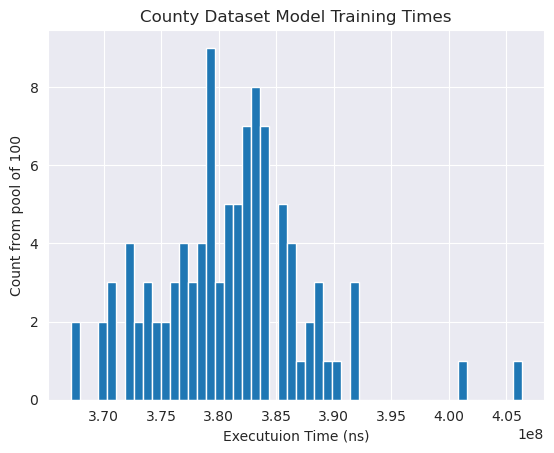

In [121]:
plt.hist(t_county, bins=50)
plt.xlabel('Executuion Time (ns)')
plt.ylabel('Count from pool of 100')
plt.title('County Dataset Model Training Times')
plt.show()

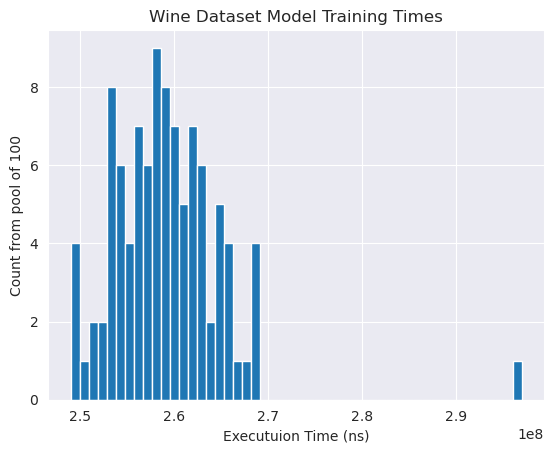

In [122]:
plt.hist(t_wine, bins=50)
plt.xlabel('Executuion Time (ns)')
plt.ylabel('Count from pool of 100')
plt.title('Wine Dataset Model Training Times')
plt.show()

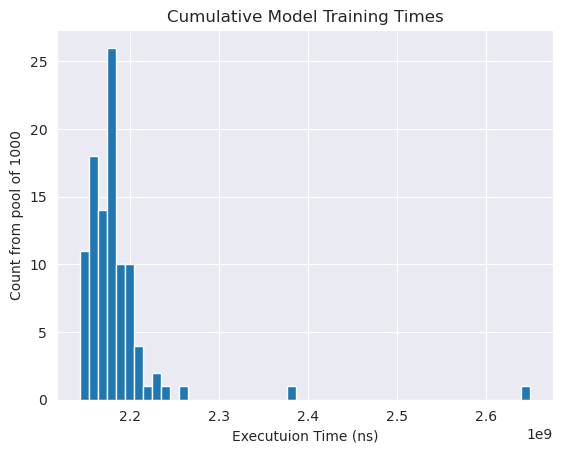

In [123]:
plt.hist(t_train, bins=50)
plt.xlabel('Executuion Time (ns)')
plt.ylabel('Count from pool of 1000')
plt.title('Cumulative Model Training Times')
plt.show()

## Graphics Processing Tasks
GPU accelerated computing (very tew technolgy, only available with Nvidia GPU's with Cuda Cores) 
https://developer.nvidia.com/how-to-cuda-python 